# Linear Regression

- Schema:
    - Data Formats
    - Data Treatment Tecnologies
    - Simple Linear Regression Model
    - Pratical Examples
    - Business Importance
    - Conclusões

references:

LSM: https://en.wikipedia.org/wiki/Least_squares

OLS: https://scikit-learn.org/stable/modules/linear_model.html

## Data Formats

Tree of most commons format a data can be provided are:
  - text(.txt)
  - Comma-separated values(.csv)
  - ExcelFile (.xlsx)

TXT - Is a raw text with only characters, It can be trick to treat this kind of data without notion of data separation, but it is the lightest, between this tree kinds of formats.

CSV - Is a raw text separed with commas, or other kind of separator like colon or semicolons. It is easy to treat this kind of data, but it is hard to add metadata. It is light as TXT.

ExcelFile - It is a binary file with sheets, It can be trick to treat this with program language beacause it can have a alot of patterns or have no pattern at all, Metadata can be include easily. It is recomended not to you this kind of data if have the data well structured and have no Metadata to be treat. 

In summary, in most of cases it is better to use one or more csv's instead of ExcelFile, one with the raw data, and other with Metadata separately.


## Data Treatment Technologies

- Excel 
    - advantage
        - is User friendly
        - there is no need for programing skills
        - it is wide applied at data analisis
    - drawbacks
        - It is not scaleble
- Python 
    - advantage
        - the data treatment is faster(in a programing process way)
        - It is wide used at DataScience and Machine Learning implementations
        - It is scalable
        - and other infity trics you can make
    - drawbacks
        - Demand a programing knowhow

In both ways it is good to know both, or for the better know alot of tools to treat the data.

More you learn, more you get harder, better, fast, strong into data analysis.

## Simple Linear Regression Model

This is a linear model wich is largely use as first aproach to get some information from the data

$$ f(x) = a*x+b
$$

### Solver - Least Square Method

The most common solver for fit the parameter is the Least Square Method (LSM-Método dos Mínimos Quadrados), which has the main objective to minimize the distances between the model ( $f(x)$ ) and data ( $y$ ). 

$$\chi^2 = \sum_{i=1}^n (y_i - f(x_i))^2$$

ref: https://en.wikipedia.org/wiki/Least_squares

This method returns a parameter estimative and statiscal properties if you solve it with Gauss-Method and get this kind of information by covariance matrix

### Getting Information from the model

### This method can provide:


- Fitted parameters
- Statistical properties as standard deviations
- A better understanding of data behaviour
- It can provide prediction in some cases

### Model Limitations

- It is hard to say or assert with 100% of assurance that the data behaves like a line as the model says
- It is needed to the scientist to have a know how and experience with the data to assert the behaviour and get rich and plausible information from the model and data.
- There is a lot of others models which can feet equally or good. 
- Cost (N_par x N_data)^2 matrix transformation

### Expansion of this method for Machine Learn Model

A expansion from this simple model is a generalized linear model

$$f(w,x)= w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 + ...$$

The solver is the same as the simple case (LSM), with other name Ordinary Least Square (OLS)

ref: https://scikit-learn.org/stable/modules/linear_model.html

## Pratical Examples

libraries importations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

### - Doguinhos

In [2]:
df = pd.read_csv("data/cardio_dogs/dogs.csv",index_col=0)
df

,mvo,lvp
1,78,32
2,92,33
3,116,45
4,90,30
5,106,38
6,78,24
7,99,44


In [3]:
#ploting raw data
df = pd.read_csv("data/cardio_dogs/dogs.csv",index_col=0)
x = df["mvo"]
y = df["lvp"]

# training model
import statsmodels.api as sm
mod_ols = sm.OLS(y,np.array([x,np.ones(len(x))]).T)
res_ols = mod_ols.fit()

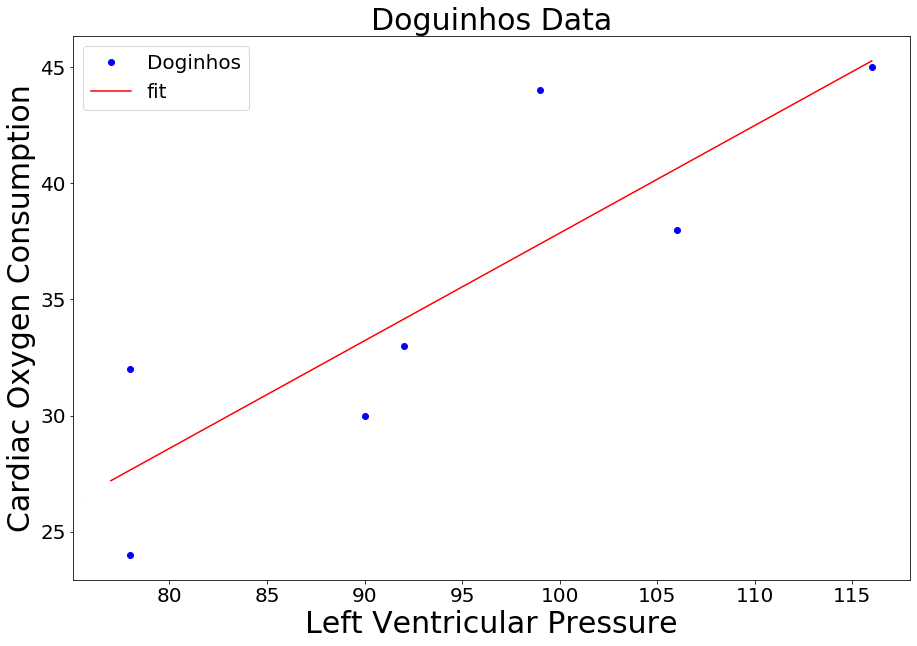

In [4]:
#ploting raw data
df = pd.read_csv("data/cardio_dogs/dogs.csv",index_col=0)
fig = plt.figure(figsize=(15,10))
x = df["mvo"]
y = df["lvp"]
plt.plot(x,y,marker='o',linestyle=' ',color='b',label='Doginhos')

# training model
import statsmodels.api as sm
mod_ols = sm.OLS(y,np.array([x,np.ones(len(x))]).T)
res_ols = mod_ols.fit()
# plot the fit
x_line = np.arange(min(x)-1,max(x)+1) 
plt.plot(x_line,res_ols.params[0]*x_line+res_ols.params[1],color ='r', label= 'fit')

# labels
plt.title('Doguinhos Data',fontsize=30)
plt.ylabel('Cardiac Oxygen Consumption',fontsize=30)
plt.xlabel('Left Ventricular Pressure',fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [5]:
# printing the model results
print(res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    lvp   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     13.44
Date:                Sun, 02 Feb 2020   Prob (F-statistic):             0.0145
Time:                        17:03:18   Log-Likelihood:                -19.046
No. Observations:                   7   AIC:                             42.09
Df Residuals:                       5   BIC:                             41.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4632      0.126      3.666      0.0

c:\users\dell\desktop\python_projects\lectures\lectures\linear_regression_presentation\venv\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [6]:
np.sqrt(res_ols.cov_params()['const']['const'])

12.010208109730256

### - Oysters

In [7]:
import pandas as pd
df = pd.read_csv("data/oyster_size/Oysters.csv",index_col=0)

In [8]:
df.head()

,ID,Weight,Volume,ThreeD,TwoD
1,1,12.92,13.04,5136699,47907
2,2,11.40,11.71,4795151,41458
3,3,17.42,17.42,6453115,60891
4,4,6.79,7.23,2895239,29949
5,5,9.62,10.03,3672746,41616


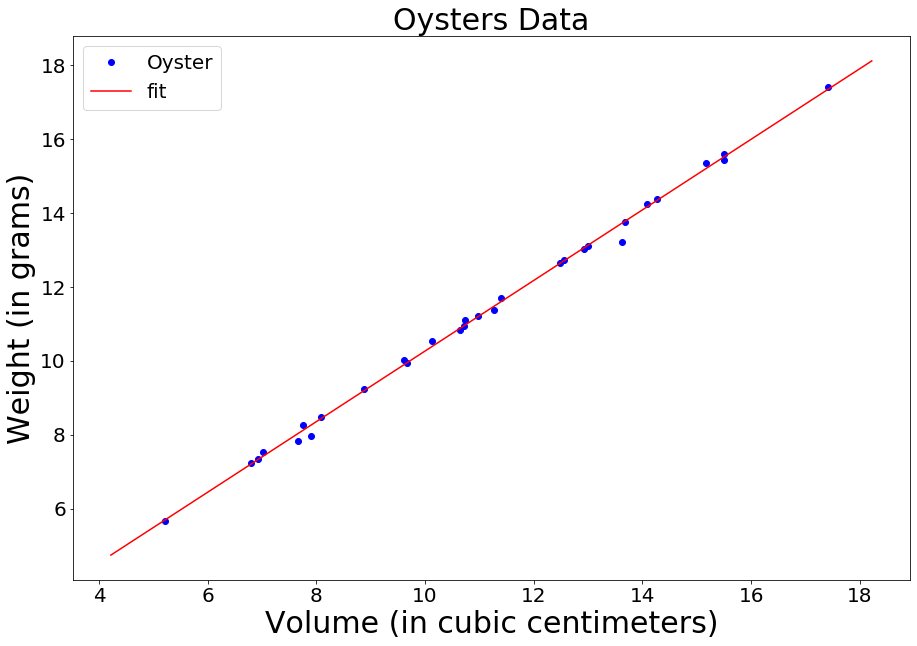

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.238e+04
Date:                Sun, 02 Feb 2020   Prob (F-statistic):           1.34e-38
Time:                        17:03:19   Log-Likelihood:                 16.756
No. Observations:                  30   AIC:                            -29.51
Df Residuals:                      28   BIC:                            -26.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9553      0.009    111.245      0.0

In [9]:
#ploting raw data
df = pd.read_csv("data/oyster_size/Oysters.csv",index_col=0)
fig = plt.figure(figsize=(15,10))
x = df['Weight']
y = df["Volume"]
plt.plot(x,y,marker='o',linestyle=' ',color='b',label='Oyster')


# training model
mod_ols = sm.OLS(y,np.array([x,np.ones(len(x))]).T)
res_ols = mod_ols.fit()
res_ols.summary()
# plot the fit
x_line = np.arange(min(x)-1,max(x)+1) 
plt.plot(x_line,res_ols.params[0]*x_line+res_ols.params[1],color ='r', label= 'fit')

# labels
plt.title('Oysters Data',fontsize=30)
plt.ylabel('Weight (in grams)',fontsize=30)
plt.xlabel('Volume (in cubic centimeters)',fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

# printing the model results
print(res_ols.summary())

## Business Importance

- Statistics Models
    - Can predict 
    - Can use information that can be profitable or can reduce cost, or none
- Know How Of New Tools
    - Can give power to solve new problems
    - Can give you agility to solve problems that you already have
    - It change the way of think about the problems
- Importance to know the tools and models limitations
    - Do not make false conclusions about data
    - It is important to know if the tool or model can provide a feasible or reasonable solution
    - It Provides you to make less misstakes when asserting informations about the data

## Conclusions

- Model
    - The model OSL or WSL(first order) can provide a first guess or first aproach to new problems that you do not have a clue how to start with
- Tecnology tools
    - both Excel and Python have wonderfull features to deal with, but I recomend to clean the data and standarize than as soon as possible, so ou can deal the data with tools you can scale
- Further aplication in Machine Learning
    - the OSL and WSL are machine learning models, and to validate some models their are used as a parameter to compair the results of other ML models as random Forest or Genetics algoritms